# Algorithmic Toolbox - Week 3 - Greedy Algorithms

## 1. Money Change

In [1]:
%%writefile first.cpp
#include <bits/stdc++.h>

using namespace std;

int get_change(int m) {
  //write your code here
  int n = 0;
  while (m > 0) {
    while (m >= 10) {
      m -= 10;
      n++;
      // cout << 10 << " ";
    }
    while (m >= 5) {
      m -= 5;
      n++;
      // cout << 5 << " ";
    }
    while (m >= 1) {
      m -= 1;
      n++;
      // cout << 1 << " ";
    }
  }
  // cout << "\n";
  return n;
}

int main() {
  int m;
  cin >> m;
  cout << get_change(m) << '\n';
  return 0;
}

Writing first.cpp


## 2. Maximum Value of the Loot

In [2]:
%%writefile second.cpp
#include <bits/stdc++.h>

using namespace std;

bool comp_items(pair<int, double> a, pair<int, double> b) {
  return a.second > b.second ? true : false;
}

double get_optimal_value(int capacity, vector<int> weights, vector<int> values) {
  double value = 0.0;
  int n = weights.size();
  vector<pair<int, double>> unit_cost(n);
  for (int i = 0; i < n; i++) {
    unit_cost[i] = make_pair(i, (double) values[i] / weights[i]);
  }
  sort(unit_cost.begin(), unit_cost.end(), comp_items);
  int index;
  for (int i = 0; i < n; i++) {
    index = unit_cost[i].first;
    if (capacity == 0)
      return value;
    int a = min(weights[index], capacity);
    value += (double) a * values[index] / weights[index];
    weights[index] -= a;
    capacity -= a;
  }
  return value;
}

int main() {
  int n;
  int capacity;
  cin >> n >> capacity;
  vector<int> values(n);
  vector<int> weights(n);
  for (int i = 0; i < n; i++) {
    cin >> values[i] >> weights[i];
  }

  double optimal_value = get_optimal_value(capacity, weights, values);

  cout.precision(10);
  cout << optimal_value << endl;
  return 0;
}

Writing second.cpp


## 3. Car Fueling

In [3]:
%%writefile third.cpp
#include <bits/stdc++.h>

using namespace std;

int compute_min_refills(int dist, int tank, vector<int> & stops) {
    // write your code here
    stops.push_back(dist);
    int n = stops.size();
    int num_refills = 0;
    int current_refill = 0;
    while (current_refill < n) {
        int last_refill = current_refill;
        while (current_refill < n && stops[current_refill + 1] - stops[last_refill] <= tank) {
            current_refill++;
        }
        if (current_refill == last_refill) {
            return -1;
        }
        if (current_refill < n) {
            num_refills++;
        }
    }
    return num_refills;
}


int main() {
    int d = 0;
    cin >> d;
    int m = 0;
    cin >> m;
    int n = 0;
    cin >> n;

    vector<int> stops(n + 1);
    stops[0] = 0;
    for (int i = 1; i <= n; ++i)
        cin >> stops.at(i);

    cout << compute_min_refills(d, m, stops) << "\n";

    return 0;
}

Writing third.cpp


## 4. Maximum Advertisement Revenue

In [4]:
%%writefile fourth.cpp
#include <bits/stdc++.h>

using namespace std;

long long max_dot_product(vector<int> a, vector<int> b) {
  // write your code here
  long long result = 0;
  for (int i = 0; i < a.size(); i++) {
    result += ((long long) a[i]) * b[i];
  }
  return result;
}

int main() {
  int n;
  cin >> n;
  vector<int> a(n), b(n);
  for (int i = 0; i < n; i++) {
    cin >> a[i];
  }
  for (int i = 0; i < n; i++) {
    cin >> b[i];
  }
  sort(a.begin(), a.end());
  sort(b.begin(), b.end());
  cout << max_dot_product(a, b) << "\n";
  return 0;
}

Writing fourth.cpp


## 5. Collecting Signatures

In [5]:
%%writefile fifth.cpp
#include <bits/stdc++.h>

using namespace std;

int n;
bool chosen[100];

struct Segment {
  int start, end;
};

bool comp_segments(Segment a, Segment b) {
  return a.start <= b.start && a.end <= b.end;
}

int check_point(vector<Segment> &segments, int point) {
  int res = 0;
  for (int i = 0; i < n; i++) {
    if (!chosen[i] && (point >= segments[i].start && point <= segments[i].end)) {
      res++;
    }
  }
  return res;
}

void choose_segments(vector<Segment> &segments, int point) {
  for (int i = 0; i < n; i++) {
    if (!chosen[i] && (point >= segments[i].start && point <= segments[i].end)) {
      chosen[i] = true;
    }
  }
}

vector<int> optimal_points(vector<Segment> &segments) {
  vector<int> points;
  //write your code here
  int c = 0;
  for (int i = 0; i < n; i++) {
    if (!chosen[i]) {
      int count = 1;
      int point = segments[i].start;
      for (int j = segments[i].start; j <= segments[i].end; j++) {
        int v = check_point(segments, j);
        if (v > count) {
          count = v;
          point = j;
        }
      }
      c += count;
      choose_segments(segments, point);
      points.push_back(point);
    }
    if (c == n)
      break;
  }
  return points;
}

int main() {
  cin >> n;
  vector<Segment> segments(n);
  for (int i = 0; i < n; ++i) {
    cin >> segments[i].start >> segments[i].end;
  }
  sort(segments.begin(), segments.end(), comp_segments);
  for (int i = 0; i < n; i++) {
    chosen[i] = false;
  }
  vector<int> points = optimal_points(segments);
  cout << points.size() << "\n";
  for (int i = 0; i < points.size(); ++i) {
    cout << points[i] << " ";
  }
  cout << "\n";
  return 0;
}

Writing fifth.cpp


## 6. Maximum Number of Prizes

In [6]:
%%writefile sixth.cpp
#include <bits/stdc++.h>

using namespace std;

vector<int> optimal_summands(int n) {
  vector<int> summands;
  if (n <= 2) {
    summands.push_back(n);
    return summands;
  }
  //write your code here
  int summand = 1;
  while (n > 0) {
    summands.push_back(summand);
    n -= summand;
    summand++;
    if ((n - summand) <= summand) {
      summands.push_back(n);
      break;
    }
  }
  return summands;
}

int main() {
  int n;
  cin >> n;
  vector<int> summands = optimal_summands(n);
  cout << summands.size() << '\n';
  for (int i = 0; i < summands.size(); ++i) {
    cout << summands[i] << ' ';
  }
  cout << "\n";
  return 0;
}

Writing sixth.cpp


## 7. Maximum Salary

In [7]:
%%writefile seventh.cpp
#include <bits/stdc++.h>

using namespace std;

bool comp(string a, string b) {
    string ab = a.append(b);
    string ba = b.append(a);
    return ab.compare(ba) > 0 ? true : false;
}

void largest(vector<string> numbers) {
    sort(numbers.begin(), numbers.end(), comp);
    for (auto n: numbers) {
        cout << n;
    }
    cout << "\n";
}

int main() {
    int n;
    cin >> n;
    vector<string> numbers(n);
    for (int i = 0; i < n; i++) {
        cin >> numbers[i];
    }
    largest(numbers);
    return 0;
}

Writing seventh.cpp


## Veredict

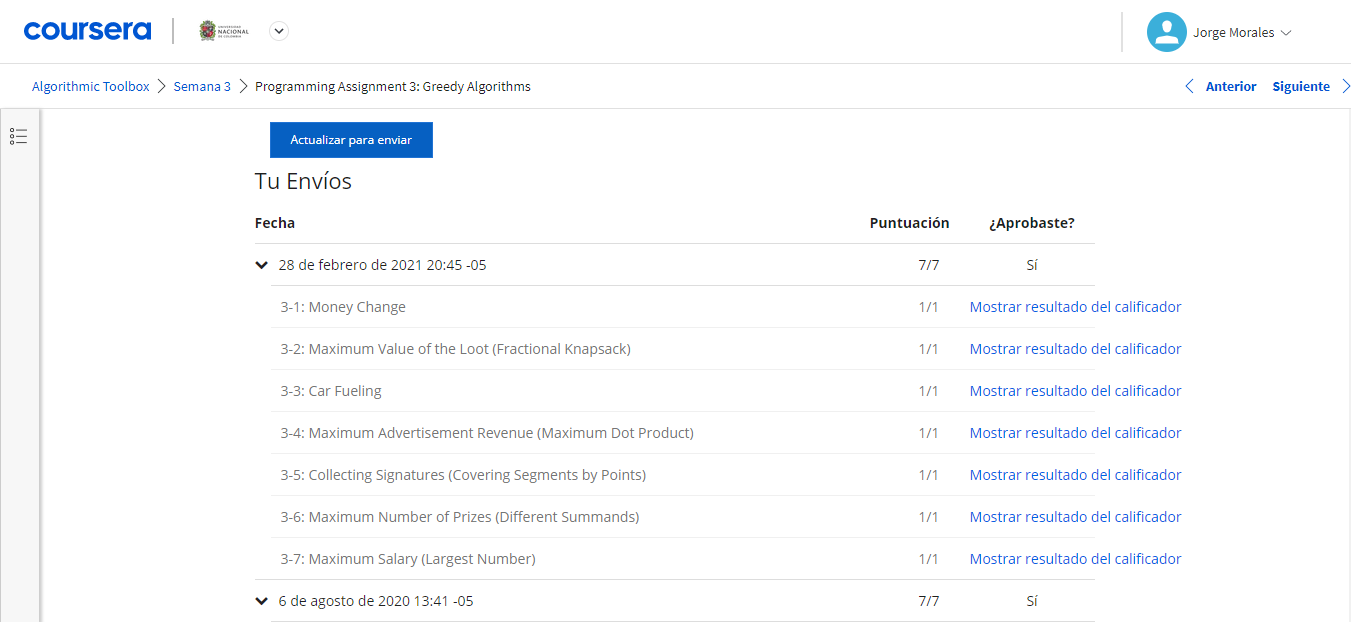